In [1]:
import sys
import csv
import math
import matplotlib.pyplot as plt

In [4]:
def read_dict(filename):

	word_dict = dict()
	with open(filename,'r') as f:
		for line in f.readlines():
			[word,num] = line.split()
			word_dict[word] = int(num)
	return word_dict


def read_formatted_tsv(filename, dim):
	with open( filename, 'r') as f:
		reader = csv.reader(f, delimiter = '\t')
		content = list(reader)

	num_feature = len(content)
	label = []
	feature = []

	for line in content:
		label.append( int(line[0]) )
		comment = line[1:]
		feature_dict = dict()
		for ele in comment:
			[key,val] = ele.split(':')
			feature_dict[ int(key) ] = int(val)
		feature_dict[dim] = 1     # bias term in the end
		feature.append(feature_dict)

	return num_feature, feature, label

def sparse_dot(X,W):
	product = 0.0
	for key in X.keys():
		product += X[key]*W[key]
	return product

def cal_loss_i(theta,x,y):
	loss_i = -float(y)*sparse_dot(x,theta) + math.log( 1 + math.exp( sparse_dot(x,theta) ) )
	return loss_i

def cal_loss(feature,label,W):
	num_data = len(feature)
	loss = 0.0

	for i in range(num_data):
		loss += cal_loss_i( W,feature[i],label[i] )
	return loss

def cal_gradient(theta,x,y):
	gradient = {}
	exp_term = math.exp( sparse_dot(x,theta) )

	for key in x.keys():
		gradient[key] = -x[key]*( y - exp_term/(1 + exp_term) )
	return gradient

def update(W,gradient,learning_rate):

	for key in gradient.keys():
		W[key] -= learning_rate*gradient[key]
	return W

def train(feature, label, feature_valid, label_valid, W, num_epoch, learning_rate):

	num_data = len(feature)
	loss_train = []
	loss_train.append( cal_loss(feature,label,W) )
	loss_valid = []
	loss_valid.append( cal_loss(feature_valid,label_valid,W) )
	for _ in range(num_epoch):

		for x,y in zip( feature, label):
			gradient = cal_gradient(W,x,y)
			W = update(W,gradient,learning_rate)

		loss_train.append( cal_loss(feature,label,W) )
		loss_valid.append( cal_loss(feature_valid,label_valid,W) )
	return W, loss_train, loss_valid

def predict(feature,label,W):

	num_data = len(feature)
	pred_label = []
	error_num = 0

	for i in range(num_data):
		x, y = feature[i], label[i]

		pred_val = math.exp( sparse_dot(x,W) )/( 1 + math.exp( sparse_dot(x,W) ))

		if pred_val >= 0.5:
			pred_y = 1
		else:
			pred_y = 0

		pred_label.append(pred_y)

		if pred_y != y:
			error_num += 1

	error = error_num/num_data

	return error, pred_label

def write_output( train_label_file, test_label_file,metricsfile,train_label, test_label,error_train, error_test):
	with open(metricsfile,'w') as f:
		f.write('error(train): ' + str(error_train) + '\n')
		f.write('error(test): ' + str(error_test) )

	with open(train_label_file,'w') as f:
		for label in train_label:
			f.write( str(label) + '\n')

	with open(test_label_file,'w') as f:
		for label in test_label:
			f.write( str(label) + '\n')

In [25]:
train_input = 'formatted_train.tsv'
validation_input = 'formatted_valid.tsv'
test_input = 'formatted_test.tsv'
dict_input = 'dict.txt'
train_out = 'train_out.labels'
test_out = 'test_out.labels'
metrics_out = 'metrics_out.txt'
num_epoch = 50

learning_rate = 0.1

word_dict = read_dict(dict_input)
dim = len(word_dict)

num_feature_train, feature_train, label_train = read_formatted_tsv(train_input, dim)
num_feature_valid, feature_valid, label_valid = read_formatted_tsv(validation_input, dim)
num_feature_test,  feature_test,  label_test  = read_formatted_tsv(test_input, dim)

# Initialize W
W = [0]*dim + [0]      # dim + 1 for the bias term

W, loss_train,loss_valid = train(feature_train, label_train,feature_valid,label_valid, W, num_epoch, learning_rate)

# prediction
error_train, train_label = predict(feature_train, label_train, W)
error_test,  test_label  = predict(feature_test,  label_test,  W)
write_output( train_out, test_out,metrics_out,train_label, test_label,error_train, error_test)





In [27]:
len(feature_valid
   )

200

In [10]:
len(step)

201

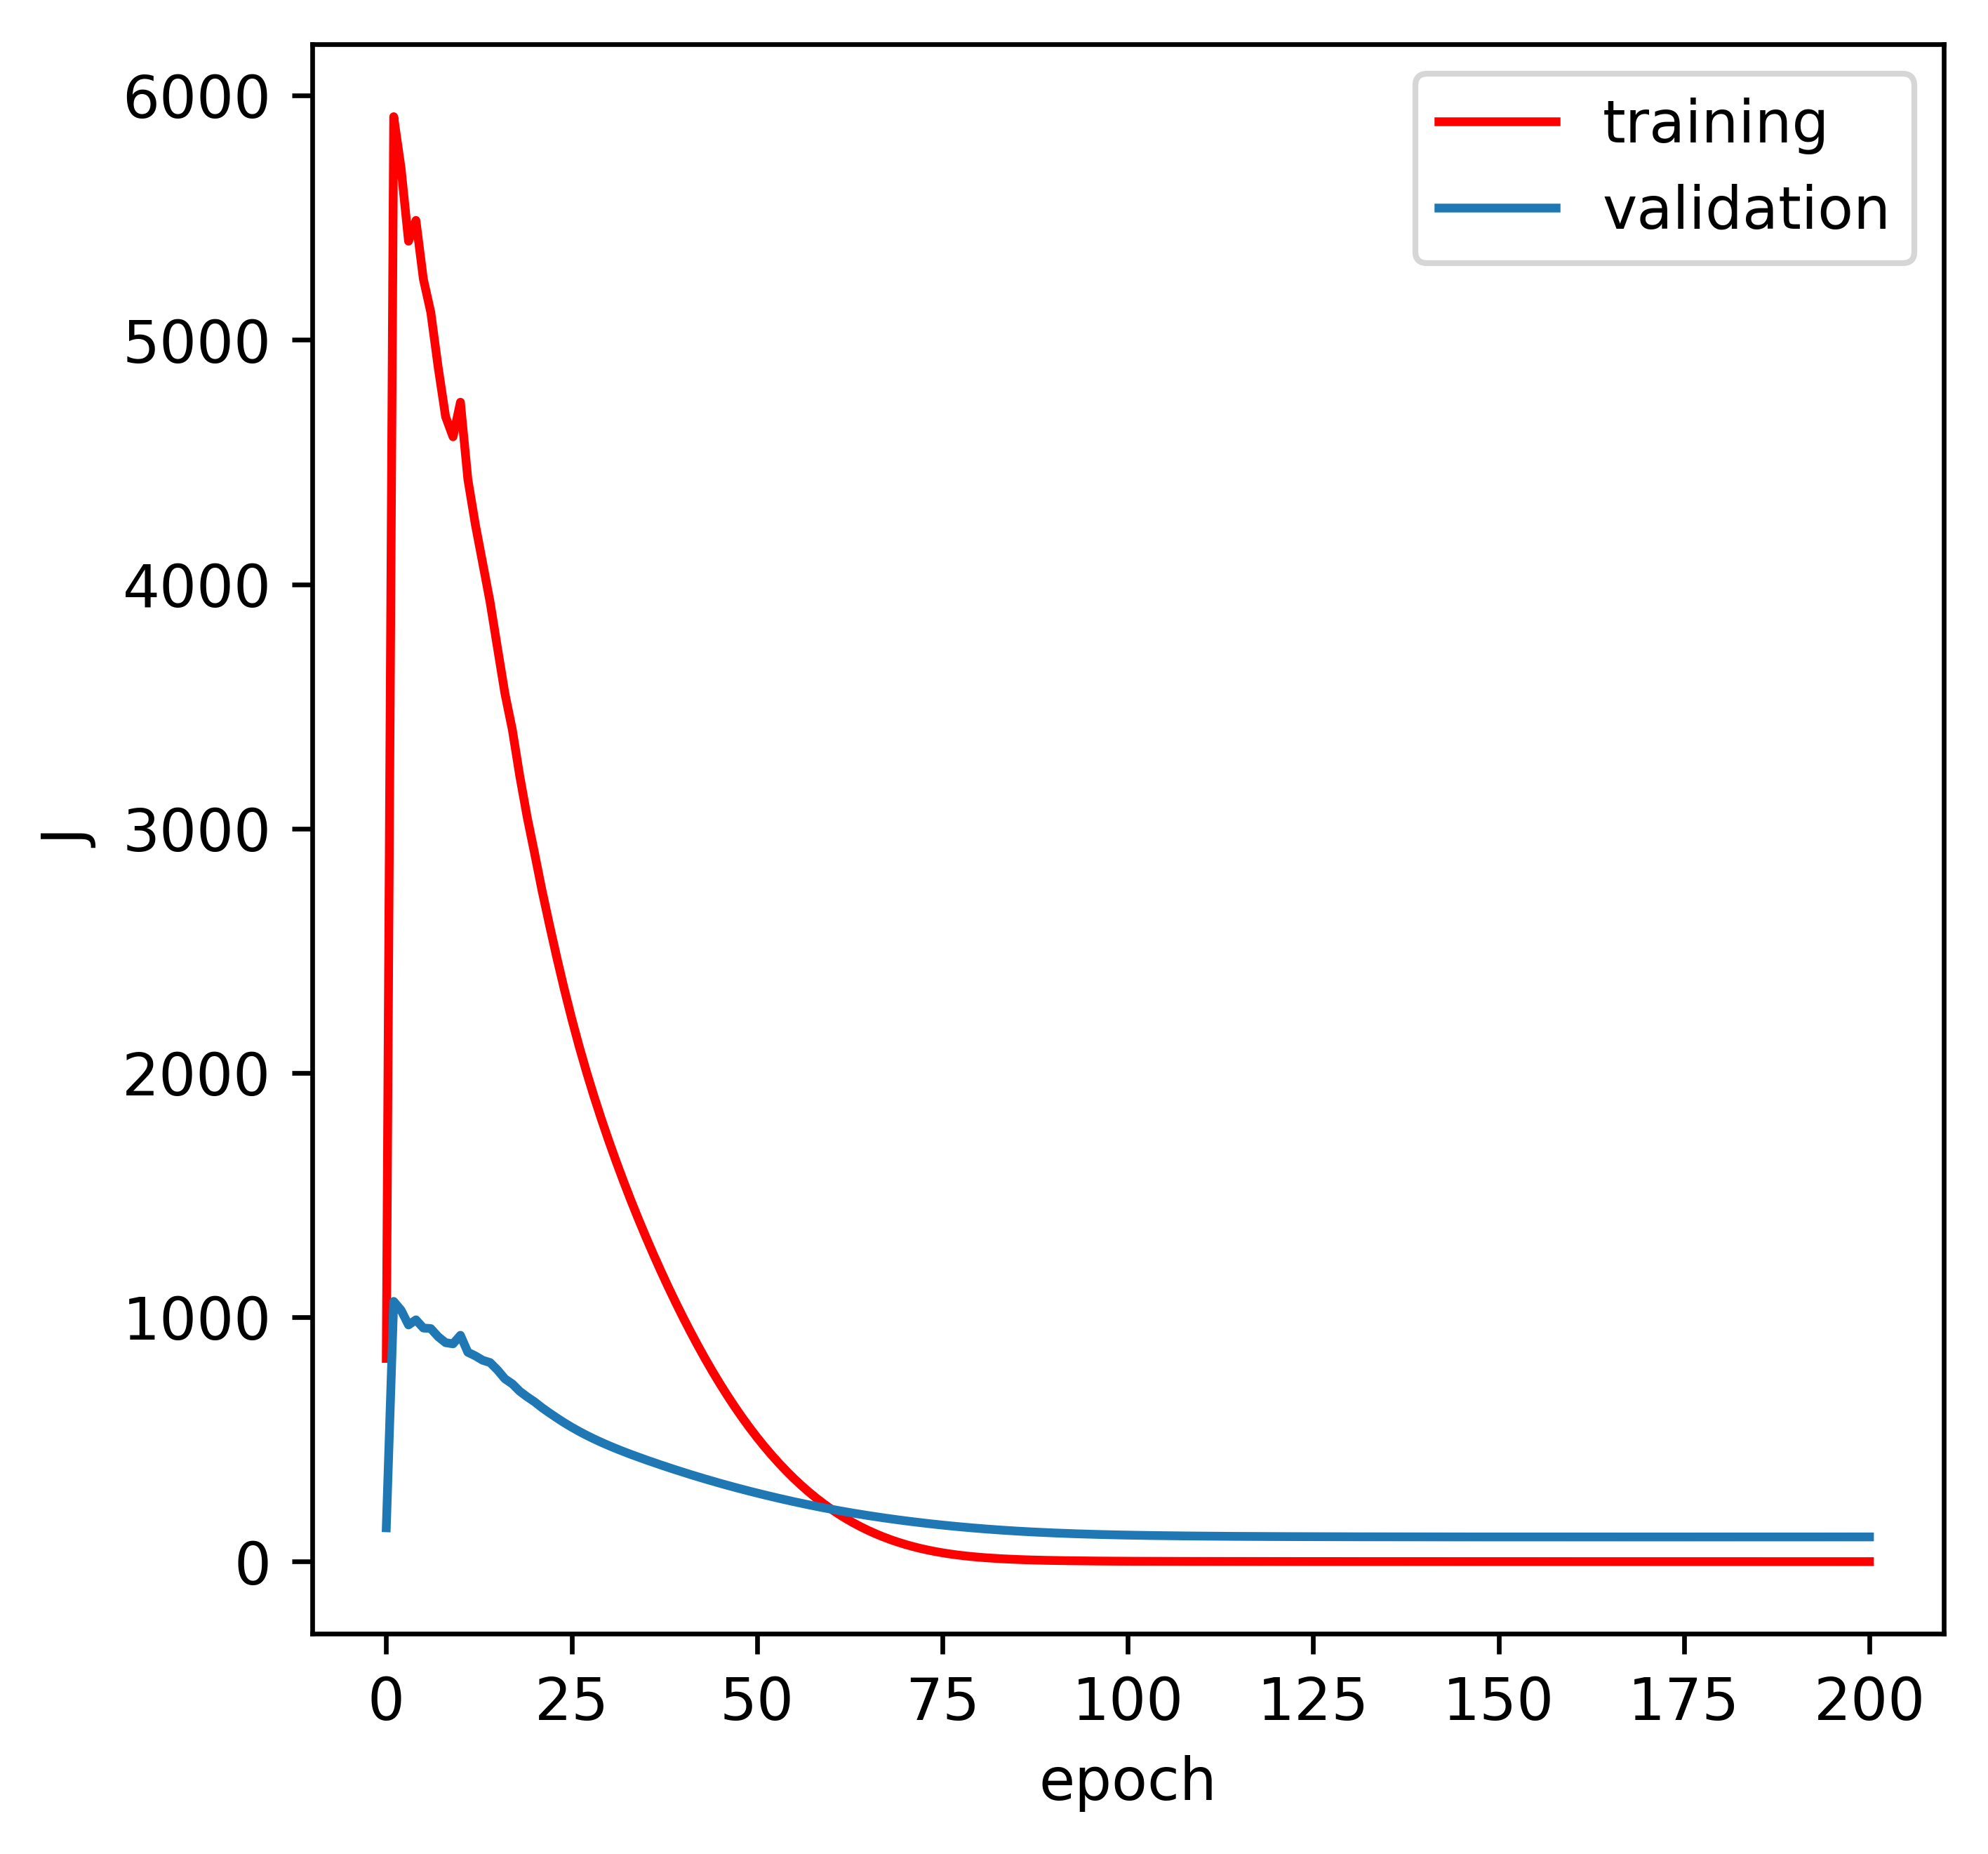

In [23]:
fig,ax = plt.subplots( figsize = (5,5), dpi = 600 )
plt.plot(step,loss_train,'r', label = 'training')
plt.plot(step,loss_valid, label = 'validation')
plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('J')
plt.show()